# Old Collection Access Pattern

The non-typed way of accessing xAOD collections is supported for now, but is depreciated, and eventually, will stop working. There isn't a lot different from the typed method. However, much less of the xAOD is defined, so watch out for holes.

In [8]:
from func_adl_servicex import ServiceXSourceXAOD

rucio_zee_r21_mc = 'rucio://mc15_13TeV:mc15_13TeV.361106.PowhegPythia8EvtGen_AZNLOCTEQ6L1_Zee.merge.DAOD_STDM3.e3601_s2576_s2132_r6630_r6264_p2363_tid05630052_00'

# from matplotlib import rcParams, cycler
import matplotlib.pyplot as plt
# import numpy as np
# plt.ion()

In [5]:
ds = ServiceXSourceXAOD(rucio_zee_r21_mc, backend='xaod_r21')

In [11]:
jets = (ds
          .SelectMany('lambda e: (e.Jets("AntiKt4EMTopoJets"))')
          .Where('lambda j: (j.pt()/1000)>30')
          .Select('lambda j: (j.pt()/1000.0)')
          .AsPandasDF("JetPt")
          .value())

rucio://mc15_13TeV:m...:   0%|          | 0/9000000000.0 [00:00]

        rucio://mc15_13TeV:m... Downloaded:   0%|          | 0/9000000000.0 [00:00]

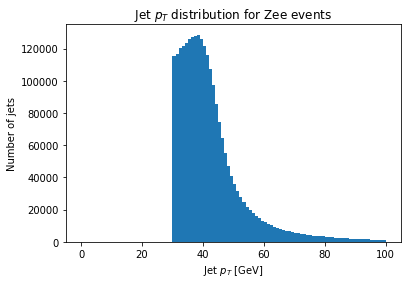

In [14]:
plt.hist(jets.JetPt, bins=100, range=(0, 100))
plt.xlabel('Jet $p_T$ [GeV]')
plt.ylabel('Number of jets')
_ = plt.title('Jet $p_T$ distribution for Zee events')